# 過学習に関する話題
- 1. わざと過学習を起こしてみる
- 2. weight decay

## 1. わざと過学習を起こしてみる
過学習が発生する条件を揃えて、過学習を起こしてみる。
1. パラメータを大量に持ち、表現力の高いモデルである
2. 訓練データが少ない

最初の条件1は、ニューラルネットワークでは層を増やせば良い。条件２は書いて字のごとくである。テキストではＭＮＩＳＴの訓練画像数を300に設定してためしている。

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD, Adam
#%matplotlib notebook

In [6]:
#トレーニングデータを少なく（３００個）指定してトレーニングさせ、過学習状況を作る
#引数には、weight_decayを使用するかどうかを指定する
def try_train(weight_decay_lambda = 0):
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

    #過学習を発生させるため、訓練データを300に削減
    all_train_size = 300
    x_train = x_train[:all_train_size]
    t_train = t_train[:all_train_size]

    #ニューラルネットワークを作成する、入力層１、隠れ層６の合計７層のネットワークを作成する
    net = MultiLayerNet(input_size = 784, hidden_size_list = [100, 100, 100, 100, 100, 100], output_size = 10,weight_decay_lambda=weight_decay_lambda)
    optimizer = SGD(lr=0.01)

    train_size = x_train.shape[0]
    batch_size = 100

    train_loss_list = []
    train_acc_list  = []
    test_acc_list   = []

    max_epochs = 201
    #max_epochs = 2
    iter_per_epoch = max(train_size / batch_size , 1)
    epoch_cnt = 0
    loop_max = 1000000000 #10億回を設定

    print("=== parameters===")
    print("iter_per_epoch %d" %(iter_per_epoch))

    for i in range(loop_max):
        batch_mask = np.random.choice(train_size, batch_size)

        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        grads = net.gradient(x_batch, t_batch)
        optimizer.update(net.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = net.accuracy(x_train, t_train)
            test_acc  = net.accuracy(x_test, t_test)

            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)

            print("i_count:" + str(i) + " epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    #X軸の値を用意
    x = np.arange(len(train_acc_list))

    #plotの設定
    plt.plot(x, train_acc_list, marker="o", label="train", markevery=10)
    plt.plot(x, test_acc_list , marker="s", label="test" , markevery=10)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc="lower right")
    plt.figure()
    plt.show()


=== parameters===
iter_per_epoch 3
i_count:0 epoch:0, train acc:0.08666666666666667, test acc:0.0955
i_count:3 epoch:1, train acc:0.11333333333333333, test acc:0.1181
i_count:6 epoch:2, train acc:0.17333333333333334, test acc:0.1387
i_count:9 epoch:3, train acc:0.20333333333333334, test acc:0.1568
i_count:12 epoch:4, train acc:0.21333333333333335, test acc:0.1781
i_count:15 epoch:5, train acc:0.23, test acc:0.1967
i_count:18 epoch:6, train acc:0.26666666666666666, test acc:0.2111
i_count:21 epoch:7, train acc:0.2833333333333333, test acc:0.2215
i_count:24 epoch:8, train acc:0.29333333333333333, test acc:0.2242
i_count:27 epoch:9, train acc:0.30333333333333334, test acc:0.2298
i_count:30 epoch:10, train acc:0.31333333333333335, test acc:0.2285
i_count:33 epoch:11, train acc:0.31666666666666665, test acc:0.2355
i_count:36 epoch:12, train acc:0.33666666666666667, test acc:0.2446
i_count:39 epoch:13, train acc:0.3333333333333333, test acc:0.2459
i_count:42 epoch:14, train acc:0.34333333333

i_count:396 epoch:132, train acc:1.0, test acc:0.7568
i_count:399 epoch:133, train acc:1.0, test acc:0.7562
i_count:402 epoch:134, train acc:1.0, test acc:0.7595
i_count:405 epoch:135, train acc:1.0, test acc:0.7573
i_count:408 epoch:136, train acc:1.0, test acc:0.7539
i_count:411 epoch:137, train acc:1.0, test acc:0.7548
i_count:414 epoch:138, train acc:1.0, test acc:0.7592
i_count:417 epoch:139, train acc:1.0, test acc:0.7567
i_count:420 epoch:140, train acc:1.0, test acc:0.756
i_count:423 epoch:141, train acc:1.0, test acc:0.7593
i_count:426 epoch:142, train acc:1.0, test acc:0.7592
i_count:429 epoch:143, train acc:1.0, test acc:0.7588
i_count:432 epoch:144, train acc:1.0, test acc:0.7588
i_count:435 epoch:145, train acc:1.0, test acc:0.7602
i_count:438 epoch:146, train acc:1.0, test acc:0.7588
i_count:441 epoch:147, train acc:1.0, test acc:0.7629
i_count:444 epoch:148, train acc:1.0, test acc:0.7639
i_count:447 epoch:149, train acc:1.0, test acc:0.7613
i_count:450 epoch:150, train 

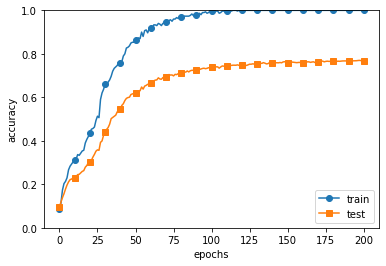

<Figure size 432x288 with 0 Axes>

In [5]:
try_train(0)

これを見ると、訓練データは正確性が1.0に近づくが、逆にテストデータが0.7程度になり、正解率が低い状態。これが過学習の状態。

=== parameters===
iter_per_epoch 3
i_count:0 epoch:0, train acc:0.07666666666666666, test acc:0.107
i_count:3 epoch:1, train acc:0.09, test acc:0.1128
i_count:6 epoch:2, train acc:0.10333333333333333, test acc:0.1199
i_count:9 epoch:3, train acc:0.12666666666666668, test acc:0.1278
i_count:12 epoch:4, train acc:0.15, test acc:0.1401
i_count:15 epoch:5, train acc:0.16333333333333333, test acc:0.1547
i_count:18 epoch:6, train acc:0.19, test acc:0.1724
i_count:21 epoch:7, train acc:0.23333333333333334, test acc:0.193
i_count:24 epoch:8, train acc:0.27666666666666667, test acc:0.2106
i_count:27 epoch:9, train acc:0.29, test acc:0.2176
i_count:30 epoch:10, train acc:0.29333333333333333, test acc:0.2294
i_count:33 epoch:11, train acc:0.30666666666666664, test acc:0.2444
i_count:36 epoch:12, train acc:0.32666666666666666, test acc:0.2632
i_count:39 epoch:13, train acc:0.3466666666666667, test acc:0.2766
i_count:42 epoch:14, train acc:0.35333333333333333, test acc:0.2848
i_count:45 epoch:15, t

i_count:384 epoch:128, train acc:0.7933333333333333, test acc:0.6314
i_count:387 epoch:129, train acc:0.8133333333333334, test acc:0.6365
i_count:390 epoch:130, train acc:0.8066666666666666, test acc:0.6276
i_count:393 epoch:131, train acc:0.7966666666666666, test acc:0.6302
i_count:396 epoch:132, train acc:0.8166666666666667, test acc:0.653
i_count:399 epoch:133, train acc:0.81, test acc:0.6379
i_count:402 epoch:134, train acc:0.82, test acc:0.6543
i_count:405 epoch:135, train acc:0.8233333333333334, test acc:0.6556
i_count:408 epoch:136, train acc:0.8333333333333334, test acc:0.6524
i_count:411 epoch:137, train acc:0.8233333333333334, test acc:0.6506
i_count:414 epoch:138, train acc:0.8133333333333334, test acc:0.6387
i_count:417 epoch:139, train acc:0.8166666666666667, test acc:0.6448
i_count:420 epoch:140, train acc:0.8466666666666667, test acc:0.662
i_count:423 epoch:141, train acc:0.82, test acc:0.6483
i_count:426 epoch:142, train acc:0.8366666666666667, test acc:0.6616
i_count:4

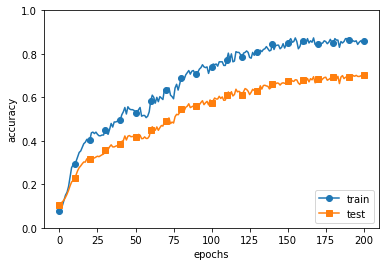

<Figure size 432x288 with 0 Axes>

In [7]:
try_train(0.1)

これを見ると、訓練データの時とテストデータの時の差が狭くなっている。ただ、テストデータの正解率は向上していないのだが。